#Importing Dependencies & Pretrained Model:

In [3]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

#Preporcessing & Loading Image:

##Our model expects the image to:
- Have 3 channels
- Be of type float 32
- Be in its own array (We have to add another axis)
- Optimally, the size should be 256 X 256

In [29]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, (256, 256))
  img = img[tf.newaxis,:]
  return img

In [30]:
style_image = load_image("Starry_Night.jpg")
content_image = load_image("Street.jpg")

In [31]:
print(content_image.shape)

(1, 256, 256, 3)


In [32]:
print(np.squeeze(content_image).shape)

(256, 256, 3)


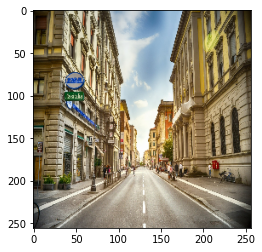

In [33]:
plt.imshow(np.squeeze(content_image))
plt.show()

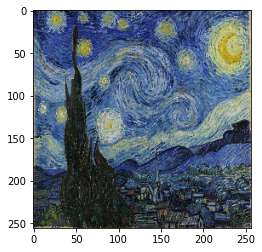

In [34]:
plt.imshow(np.squeeze(style_image))
plt.show()

#Perform Style Transfer & Export Stylized Image:

In [35]:
stylized_image = model(tf.constant(content_image),tf.constant(style_image))[0]

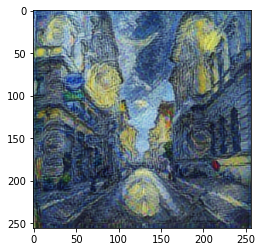

In [36]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [37]:
cv2.imwrite('Stylized.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True